In [1]:
import op1tocube as o2c

In [2]:
def combine_moves(comb):
    sum = 0
    for move in comb:
        if len(move) == 1:
            sum += 1
        elif move[1] == "2":
            sum += 2
        else:
            sum -= 1
    sum = sum % 4
    if (sum == 1):
        return comb[0][0]
    elif (sum == 2):
        return comb[0][0] + str(2)
    elif (sum == 3):
        return comb[0][0] + "\'"
    else:
        return None

In [3]:
def combine_repeated_notations(ordered):
    
    #combine repeated
    i = 0
    notations_combined = []
    curr_face = ""
    curr_list = []
    while (i < len(ordered) -1):
        curr_face = ordered[i][0]
        curr_list += [ordered[i]]
        next_face = ordered[i+1][0]
        if (next_face != curr_face):
            notations_combined.append(curr_list)
            curr_list = []
        i+= 1
        
        
    notations_cleaned = []
    for comb in notations_combined:
        if len(comb) == 1:
            cleaned = comb[0]
        else:
            cleaned = combine_moves(comb)
        if cleaned is not None:
            notations_cleaned.append(cleaned)
        
    #print(comb, cleaned)
    
    return notations_cleaned

In [4]:
#All tracks: chan 0: L, chan 1: R
#track 1: U
#track 2: D
#track 3: B
#track 4: F

all_tracks_file = "op1-audio.wav"
track_1_file = "track_1.wav"
track_2_file = "track_2.wav"
track_3_file = "track_3.wav"
track_4_file = "track_4.wav"


files = [all_tracks_file, track_1_file, track_2_file, track_3_file, track_4_file]
titles = ["Master", "Track 1", "Track 2", "Track 3", "Track 4"]
faces = [["L", "R"], ["U"], ["D"], ["B"], ["F"]]

colors = [['orange', 'r'], ['w'], ['y'], ['b'], ['g']]
sr = 44100
bin_size = 88200
bin_gain = 30

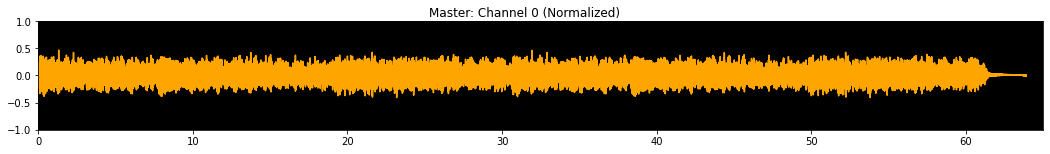

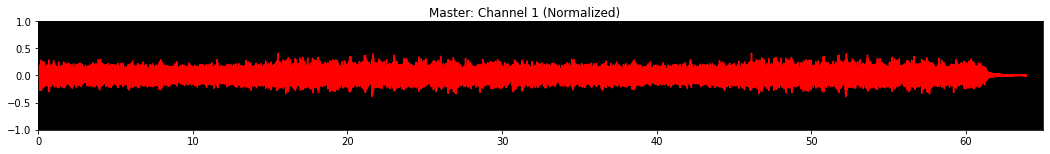

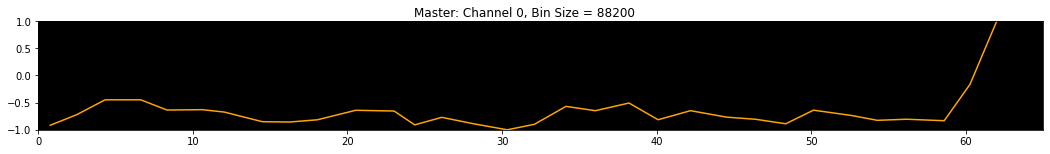

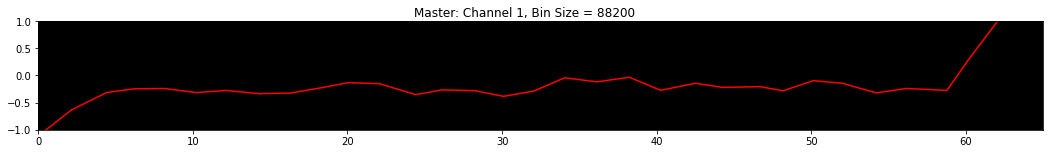

L', L', L, L, L2, L2, L, L2, L2, L', L, L', L, L, L, L2, L, L', 
R', R, R', R', R2, R, R2, R2, R', R, R', R, R', R, R', R, R2, R, R', 


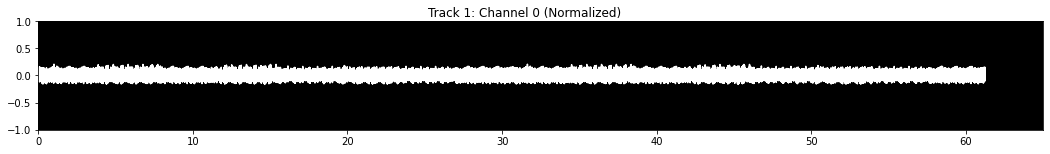

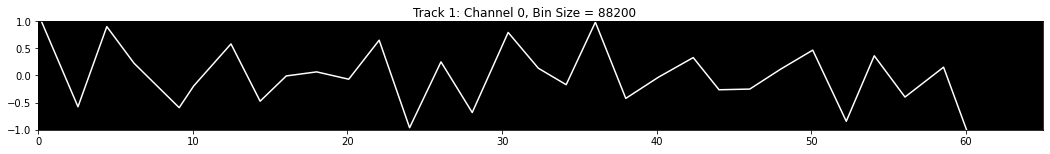

U', U, U2, U2, U', U2, U', U, U', U, U', U, U2, U, U', U2, U', U', U', U, U', U, 


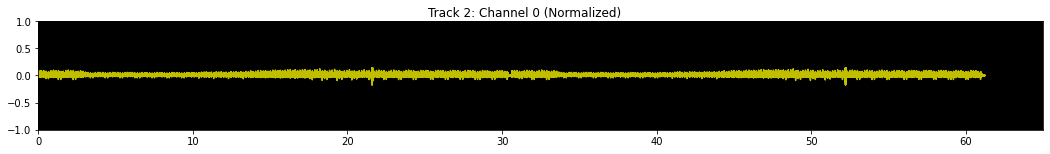

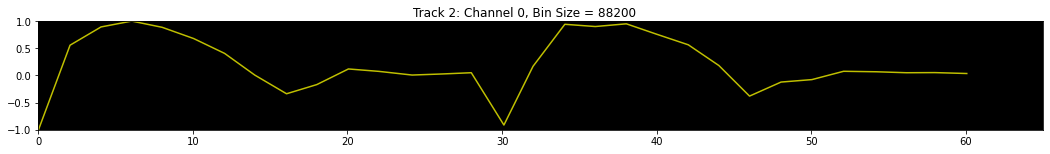

D', D', D2, D2, D2, D', D2, D', D, D', D2, D, 


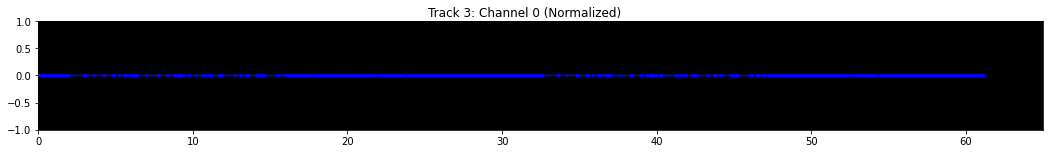

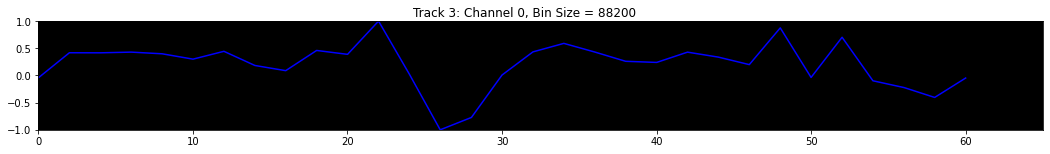

B, B', B, B2, B, B2, B, B', B, B2, B, B, B2, B, B', B, B, 


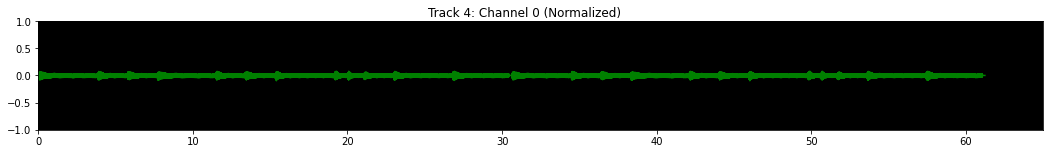

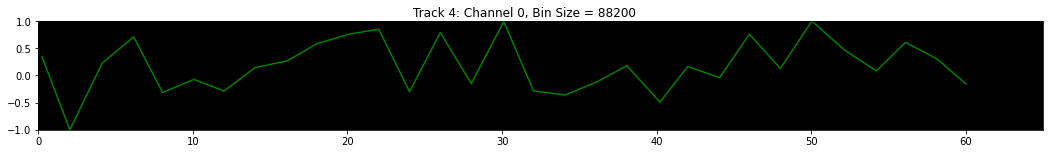

F', F2, F', F, F', F, F', F, F', F, F2, F2, F', F, F', F, F', F, F2, F, 


In [5]:
all_data = []
all_normed = []
all_bxvals = []
all_notations = []


all_binned_data = []

#for each track....
for file, title, face, c in zip(files, titles, faces, colors):
    data, normed = o2c.get_audio_arrays(file) #turn data into arrays
    xvals = o2c.get_xvals(normed, sr) #get corresponding xvals 
    

    o2c.plot_channels(normed, c, xvals, sr, 65, title=title, norm=True) #plot the normalized data

    
    #bin the data & normalize!
    #taking chunks and choosing the mean yval
    #and choosing the xval at which the original sound file is closest to this mean
    binned_data, binned_xvals = o2c.bin_channels(normed, bin_size, bin_gain, xvals, normalize=True)
    
    
    
    #plot the binned data
    if (title == "All Tracks"):
        o2c.plot_binned(binned_data, bin_size, sr, c, binned_xvals, 65, title=title, ylim=1)
    else:
        o2c.plot_binned(binned_data, bin_size, sr, c, binned_xvals, 65, title=title, ylim=1)
        
    #for line segments attaching binned data, find out if they point up "u" or down "d"
    chan_shapes = o2c.get_shapes(binned_data, binned_xvals)

    for norm, co, shapes, f in zip(normed, c, chan_shapes, face):
        
        #turn u/d into cube notation, with u --> clockwise, d --> counterclockwise
        ag, tr, notation = o2c.shapes_to_cube_notation(shapes, f)
        for a, t, note in zip(ag, tr, notation):
            print(note[0], end=", ")
        print()
        all_notations.append(notation)
    

    all_data.append(data)
    all_normed.append(normed)
    all_binned_data.append(binned_data)
    all_bxvals.append(binned_xvals)
    

In [11]:
all_notations[5]

[["F'", 0.22634929014736085],
 ['F2', 4.126192003773244],
 ["F'", 6.159185953699274],
 ['F', 8.03152224777537],
 ["F'", 10.063223680216087],
 ['F', 20.133658247455504],
 ["F'", 22.021232642411086],
 ['F', 24.01726512740622],
 ["F'", 26.00424999000416],
 ['F', 28.00840039183688],
 ['F2', 32.03368532877424],
 ['F2', 36.14797256623539],
 ["F'", 38.079810016126615],
 ['F', 40.217974073015526],
 ["F'", 42.008382899119034],
 ['F', 44.08037913105803],
 ["F'", 46.01273812309246],
 ['F', 48.00970031364721],
 ['F2', 52.14654991773794],
 ['F', 54.22126723911971]]

In [6]:
#put all notations into a list
#and sort by their xvals (points in time)
notations_together = []
for face in all_notations:
    notations_together += face

notations_together = sorted(notations_together, key=lambda x: x[1])

#get just the face info (removing time info)
notations_ordered = []
for note in notations_together: 
    notations_ordered.append(note[0])


#get rid of repeated moves (might take more than 2 times, your mileage may vary)
notations_cleaned = (combine_repeated_notations(notations_ordered))
notations_cleaned = (combine_repeated_notations(notations_cleaned))
notations_cleaned = (combine_repeated_notations(notations_cleaned))

#print out final scramble
for move in notations_cleaned:
    print(move, end=", ")

B, U', F', B', U, L, R', U', D2, B', F, U2, L', B2, F, R', L, B, U2, F', U', D', B', U, B', D2, L2, B, U, F, D2, F', U', R2, L2, F, U, B2, L, R, F', U', D2, F, D', U, L2, R2, D2, F2, R2, L2, U2, R', D', L', U, D, L, U', R, F, L', R', B, L, U2, F, R, F', U', R', B2, F, R, B, F', R', B', F, R, L, B, U', R2, F2, U, L2, U', R, F, D2, L, U, 

## To Solve (one soln):
starting w/ white on bottom, orange in front:  
  
### cross:
U L F' D L2 D U L2  (8)
  
### first pair (B/R): 
U R U R' U R' U' R (8)   
### second pair (G/R): 
U2 L U' L' U L U L' (8)  
### third pair (G/O): 
U' L' U2 L U L' U' L (8)  
### fourth pair (B/O): 
U R U R' U' R U R' (8)   
    
### OLL: 
U' r' U' R U' R' U2 r (8)    
     
### PLL: 
x' R U' R D2 R' U R D2 R2 x U (12)  
  
total 60 moves  

## To Solve (another soln):
starting w/ white on bottom, orange in front:  
  
### cross:
L' D' L U L F' D' F2 D' (9)  
  
### first pair (B/O): 
L U' L' R U' R (6)   
### second pair (B/R): 
U L U2 L' U2 R' U' R (8)
### third pair (G/R): 
L U L' U L U L' (7)
### fourth pair (G/O): 
U' L' U L U' L' U' L (8)
    
### OLL: 
U' R U R' U' R' F R F' (9)  
     
### PLL: 
U' R U R' F' R U R' U' R' F R2 U' R U (15) 
  
total 55 moves  

In [ ]:
#getting stuff for visualization.....

In [ ]:
notations_together

In [ ]:
notations_together

In [ ]:
all_notations[0]

In [ ]:
scaled_all_notations = all_notations.copy()

In [ ]:
for i in range(len((scaled_all_notations))):
    face = scaled_all_notations[i]
    for j in range(len(face)):
        face[j][1] = face[j][1] / xvals[-1]

In [ ]:
scaled_all_notations[3]

In [ ]:
xvals